# Rafael Santos - 118336 - Ex. 9, 10, 11, 12, 13 e 14

### Exercício 9 - Histograma do número de doenças por classe (diseaseClassName)

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# Conexão à base de dados SQL Server do professor
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=deti-sql-aulas.ua.pt;'
    'DATABASE=sbd24_118336;'
    'UID=sbd24_118336;'
    'PWD=pascoa'
)

In [4]:
# Consulta SQL: contar o número de doenças por classe
query = """
SELECT dc.diseaseClassName, COUNT(DISTINCT da.diseaseNID) AS num_doencas
FROM diseaseAttributes da
JOIN disease2class d2c ON da.diseaseNID = d2c.diseaseNID
JOIN diseaseClass dc ON d2c.diseaseClassNID = dc.diseaseClassNID
GROUP BY dc.diseaseClassName
ORDER BY num_doencas DESC;
"""

In [5]:
# Ler os dados para um DataFrame
df = pd.read_sql(query, conn)

# Mostrar os primeiros resultados (opcional)
print(df.head())

                                    diseaseClassName  num_doencas
0     Congenital, Hereditary, and Neonatal Diseas...         5165
1                            Nervous System Diseases         4696
2        Pathological Conditions, Signs and Symptoms         3805
3                                          Neoplasms         3352
4                           Musculoskeletal Diseases         2197


C:\Users\rafae\AppData\Local\Temp\ipykernel_23808\2231429840.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


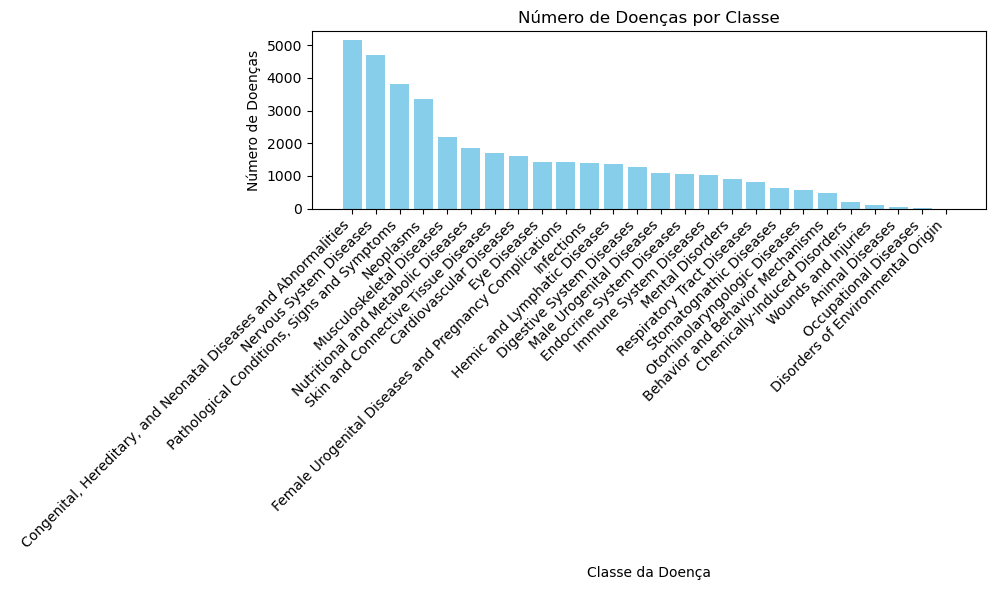

In [6]:
# Criar o histograma
plt.figure(figsize=(10, 6))
plt.bar(df['diseaseClassName'], df['num_doencas'], color='skyblue')
plt.xlabel('Classe da Doença')
plt.ylabel('Número de Doenças')
plt.title('Número de Doenças por Classe')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Exercício 10 - Gráfico da evolução do número de entradas na tabela variantDiseaseNetwork por tipo de doença e ano de publicação

In [7]:
import seaborn as sns

In [8]:
# Consulta SQL para obter o número de entradas por ano e tipo de doença
query = """
SELECT 
    d.type, 
    vdn.year,
    COUNT(*) AS num_registos
FROM dbo.variantDiseaseNetwork vdn
JOIN dbo.diseaseAttributes d ON vdn.diseaseNID = d.diseaseNID
WHERE vdn.year IS NOT NULL
GROUP BY d.type, vdn.year
ORDER BY vdn.year, d.type;
"""

In [12]:
# Ler os dados
df_evolucao = pd.read_sql(query, conn)

C:\Users\rafae\AppData\Local\Temp\ipykernel_23808\2192411564.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_evolucao = pd.read_sql(query, conn)


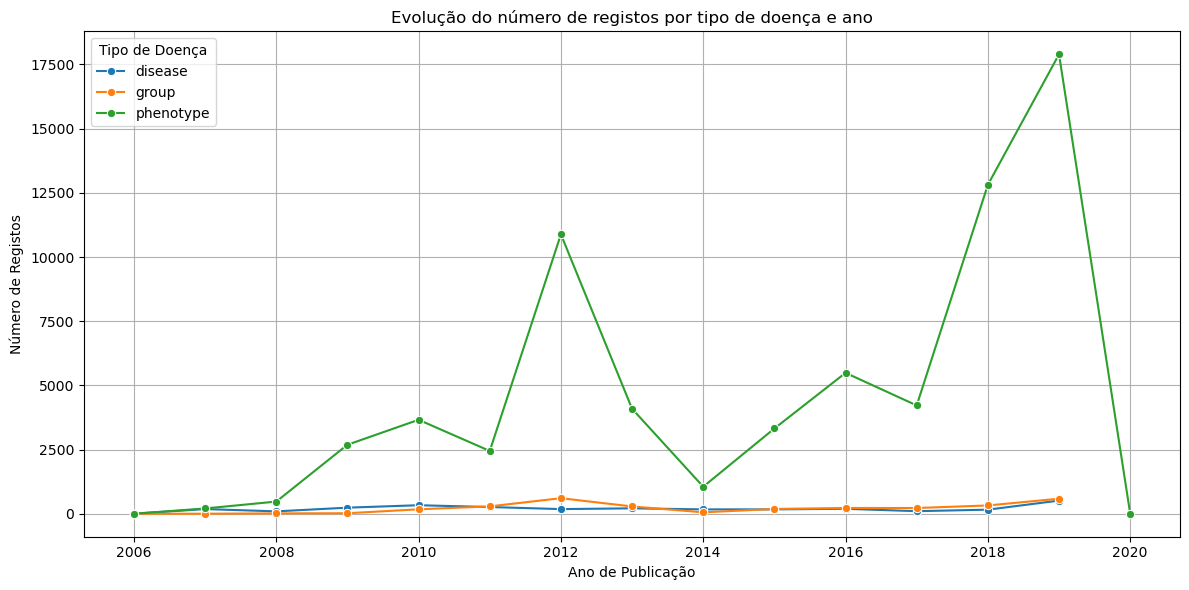

In [13]:
# Visualização com Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_evolucao, x='year', y='num_registos', hue='type', marker='o')

plt.title('Evolução do número de registos por tipo de doença e ano')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Registos')
plt.legend(title='Tipo de Doença')
plt.grid(True)
plt.tight_layout()
plt.show()

### Exercício 11 - Crie um documento Excel (ou um arquivo CSV) com uma tabela representando o geneId, geneName e o número de entradas correspondentes em geneDiseaseNetwork

In [15]:
# Query: Contar o número de entradas por gene
query = """
SELECT 
    g.geneId,
    g.geneName,
    COUNT(gdn.geneNID) AS numEntries
FROM geneAttributes g
LEFT JOIN geneDiseaseNetwork gdn ON g.geneNID = gdn.geneNID
GROUP BY g.geneId, g.geneName
ORDER BY numEntries DESC;
"""

In [16]:
# Ler os dados
df_gene_counts = pd.read_sql(query, conn)

C:\Users\rafae\AppData\Local\Temp\ipykernel_23808\777010283.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gene_counts = pd.read_sql(query, conn)


In [17]:
# Exportar para CSV
df_gene_counts.to_csv("gene_entries.csv", index=False)

### Exercício 12 - Escreva um script Python no VSCode que peça ao usuário um geneId ou um geneName e liste o diseaseNID, diseaseId, diseaseName e tipo das doenças correspondentes

In [67]:
# Conexão à base de dados SQL Server
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=deti-sql-aulas.ua.pt;'
    'DATABASE=sbd24_118336;'
    'UID=sbd24_118336;'
    'PWD=pascoa'
)

In [68]:
# Escolha de modo
modo = input("Pretende procurar por geneId ou geneName? (escreva 'id' ou 'name'): ").strip().lower()

In [69]:
# Construção da query
if modo == "id":
    gene_input = input("Introduza o geneId: ").strip()
    query = """
        SELECT DISTINCT d.diseaseNID, d.diseaseId, d.diseaseName, d.type
        FROM geneDiseaseNetwork gdn
        JOIN geneAttributes g ON gdn.geneNID = g.geneNID
        JOIN diseaseAttributes d ON gdn.diseaseNID = d.diseaseNID
        WHERE g.geneId = ?
    """
elif modo == "name":
    gene_input = input("Introduza o geneName: ").strip()
    query = """
        SELECT DISTINCT d.diseaseNID, d.diseaseId, d.diseaseName, d.type
        FROM geneDiseaseNetwork gdn
        JOIN geneAttributes g ON gdn.geneNID = g.geneNID
        JOIN diseaseAttributes d ON gdn.diseaseNID = d.diseaseNID
        WHERE g.geneName = ?
    """
else:
    print("Opção inválida. Deve escrever 'id' ou 'name'.")
    conn.close()
    exit()

In [70]:
# Executar a query e apresentar os resultados
try:
    df = pd.read_sql(query, conn, params=[gene_input])

    if df.empty:
        print("Nenhum resultado encontrado para o valor introduzido.")
    else:
        display(df)  # Mostra como tabela formatada no notebook

except Exception as e:
    print("Erro ao executar a consulta:", e)

C:\Users\rafae\AppData\Local\Temp\ipykernel_23808\1883683187.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=[gene_input])


,diseaseNID,diseaseId,diseaseName,type
0,53,C0001418,Adenocarcinoma,group
1,118,C0002395,Alzheimer's Disease,disease
2,141,C0002871,Anemia,disease
3,159,C0002893,Refractory anemias,disease
4,197,C0003165,Anthracosis,disease
...,...,...,...,...
97,20678,C2711227,Steatohepatitis,disease
98,21542,C2936719,Mechanical Allodynia,phenotype
99,23421,C3714514,Infection,group
100,23433,C3714636,Pneumonitis,disease


### Exercício 13 - Escreva um script Python para inserir novos registros na tabela diseaseAttributes

In [89]:
# 1. Estabelecer conexão com a base de dados
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=deti-sql-aulas.ua.pt;'
    'DATABASE=sbd24_118336;'
    'UID=sbd24_118336;'
    'PWD=pascoa'
)

cursor = conn.cursor()

In [86]:
# 2. Pedir os dados ao utilizador
print("Inserção de novo registo na tabela diseaseAttributes")

# Buscar o próximo diseaseNID disponível automaticamente
cursor.execute("SELECT ISNULL(MAX(diseaseNID), 0) + 1 FROM dbo.diseaseAttributes")
diseaseNID = cursor.fetchone()[0]

print(f"\nSerá usado o diseaseNID: {diseaseNID}")

# Pedir os outros dados ao utilizador
diseaseId = input("Introduz o diseaseId (ex: C0000729): ").strip()
diseaseName = input("Introduz o diseaseName (ex: Abdominal Cramps): ").strip()
type_ = input("Introduz o tipo de doença (ex: phenotype): ").strip()

Inserção de novo registo na tabela diseaseAttributes

Será usado o diseaseNID: 30294


In [87]:
# 3. Construir a query com diseaseNID incluído
insert_query = """
    INSERT INTO dbo.diseaseAttributes (diseaseNID, diseaseId, diseaseName, type)
    VALUES (?, ?, ?, ?)
"""

In [88]:
# 4. Executar a inserção com tratamento de erros
try:
    cursor.execute(insert_query, (diseaseNID, diseaseId, diseaseName, type_))
    conn.commit()  # Confirmar alterações
    print("\nRegisto inserido com sucesso!")

except pyodbc.Error as e:
    print("\nErro ao inserir o registo:", e)


Registo inserido com sucesso!


### Exercício 14 - O script em 13 não valida entradas no tipo de coluna. Para contornar esse problema, crie uma nova tabela (script SQL) para salvar todos os tipos de doenças da tabela diseaseAttributes. Em seguida, crie uma cópia da tabela diseaseAttributes com uma chave estrangeira para a nova tabela. Por fim, copie e modifique o script em 13 para acomodar essas alterações.

In [90]:
# Conexão à base de dados
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=deti-sql-aulas.ua.pt;'
    'DATABASE=sbd24_118336;'
    'UID=sbd24_118336;'
    'PWD=pascoa'
)
cursor = conn.cursor()

print("Inserção de novo registo na tabela diseaseAttributes_v2")

Inserção de novo registo na tabela diseaseAttributes_v2


In [91]:
# Obter próximo diseaseNID disponível
cursor.execute("SELECT ISNULL(MAX(diseaseNID), 0) + 1 FROM dbo.diseaseAttributes_v2")
diseaseNID = cursor.fetchone()[0]
print(f"\nSerá usado o diseaseNID: {diseaseNID}")


Será usado o diseaseNID: 30295


In [92]:
# Obter lista de tipos válidos
cursor.execute("SELECT type FROM dbo.diseaseTypes")
valid_types = [row[0] for row in cursor.fetchall()]
print("\nTipos válidos disponíveis:", ", ".join(valid_types))


Tipos válidos disponíveis: disease, group, phenotype


In [93]:
# Pedir dados ao utilizador
diseaseId = input("Introduz o diseaseId (ex: C0000729): ").strip()
diseaseName = input("Introduz o diseaseName (ex: Abdominal Cramps): ").strip()
type_ = input("Introduz o tipo de doença: ").strip()

In [94]:
# Validar o tipo e inserir
if type_ not in valid_types:
    print(f"\n Tipo inválido. Os tipos válidos são: {', '.join(valid_types)}")
else:
    try:
        insert_query = """
            INSERT INTO dbo.diseaseAttributes_v2 (diseaseNID, diseaseId, diseaseName, type)
            VALUES (?, ?, ?, ?)
        """
        cursor.execute(insert_query, (diseaseNID, diseaseId, diseaseName, type_))
        conn.commit()
        print("\n Registo inserido com sucesso!")

    except pyodbc.Error as e:
        print("\n Erro ao inserir o registo:", e)


 Registo inserido com sucesso!


In [95]:
# Fechar a conexão
cursor.close()
conn.close()